In [1]:
%pylab inline
import pandas as pd
from scipy import linalg
from itertools import combinations
import numpy as np
import matplotlib.pyplot as plt
import random
import time
import scipy.io as io
from scipy.io import mmread
import scipy.sparse as sparse
from sklearn.tree import DecisionTreeClassifier


Populating the interactive namespace from numpy and matplotlib


$\def\m#1{\mathbf{#1}}$
$\def\mm#1{\boldsymbol{#1}}$
$\def\mb#1{\mathbb{#1}}$
$\def\c#1{\mathcal{#1}}$
$\def\mr#1{\mathrm{#1}}$
$\newenvironment{rmat}{\left[\begin{array}{rrrrrrrrrrrrr}}{\end{array}\right]}$
$\newcommand\brm{\begin{rmat}}$
$\newcommand\erm{\end{rmat}}$
$\newenvironment{cmat}{\left[\begin{array}{ccccccccc}}{\end{array}\right]}$
$\newcommand\bcm{\begin{cmat}}$
$\newcommand\ecm{\end{cmat}}$

# Homework 3
## Homework guideline

- This is a group homework. Your group only needs to submit one homework. You can form a group of 1, 2 or 3.


- Submit your work(your reasoning and your code) as a SINGLE .ipynb document. Please rename the document as _HW1_YOURNAME.ipynb_ (for example, _HW1_FELIX.ipynb_). You are responsible for checking that you have correctly submitted the correct document. If your code cannot run, you may receive NO point.

- Please justify all short answers with a brief explanation.

- You only use the Python packages included in the following cell. You are not allowed to use other advanced package or modules unless you are permitted to.

- In your final submission include the plots produced by the unedited code as presented below, as well as any additional plots produced after editing the code during the course of a problem. You may find it necessary to copy/paste relevant code into additional cells to accomplish this.

- Feel free to use the lecture notes and other resources. But you
must understand, write, and hand in your own answers. In addition, you must write and submit
your own code in the programming part of the assignment (we may run your code).
If you copy someone else homework solution, both of you may receive ZERO point.

- **Late assignments:** Recognizing that students may face unusual circumstances and require some flexibility in the course of the semester, each student will have a total of 7 free late (calendar) days to use as s/he sees fit, but no more than 4 late days can be used on any single assignment. Late days are counted at the granularity of days: e.g., 3 hours late is one late day.  

- **You must write your own code and fill in the your answer in the text box.** If you fail to do either of that, you will receive zero point.



**Your group member:**



---



---


#Q1:  Soft margin SVM (50pt)

In the problem, you will implement the soft margin SVM using different gradient descent methods. Our
goal for this problem is to investigate the convergence of different gradient descent methods on a sample dataset and think about the characteristics of these different methods that lead to different performances.

To recap, given a dataset of $n$
samples $\mathcal{D} =
\left\{\left(\mathbf{x}^{(i)},
y^{(i)}\right)\right\}_{i=1}^n$, where every $d$-dimensional feature vector $\mathbf{x}^{(i)} \in \mathbb{R}^d$ is
associated with a label $y^{(i)} \in
\{-1,1\}$, to estimate the parameters $\boldsymbol{\theta} = (\mathbf{w}, b)$
of the soft margin SVM, we can minimize the loss function:

\begin{aligned}
f(\mathbf{w},b; \mathcal{D}) &= \frac{1}{2}
\|\mathbf{w}\|_2^2 + C \sum_{(\mathbf{x}^{(i)}, y^{(i)}) \in
\mathcal{D}} \max\left\{0, 1 - y^{(i)}( \mathbf{w}\cdot
\mathbf{x}^{(i)} + b )\right\} \\
&= \frac{1}{2} \|\mathbf{w}\|_2^2 + C
\sum_{(\mathbf{x}^{(i)}, y^{(i)}) \in \mathcal{D}}
L(\mathbf{x}^{(i)}, y^{(i)}; \boldsymbol{\theta})
\end{aligned}

In order to minimize the function, we first obtain the gradient with
respect to $\boldsymbol{\theta}$. The
partial derivative with respect to $w_j$, the $j$-th entry in the vector $\mathbf{w}$, is:

\begin{aligned}
    \partial_{w_j} f(\mathbf{w},b; \mathcal{D}) =
    \frac{\partial f(\mathbf{w},b; \mathcal{D})}{\partial w_j} =
    w_j + C \sum_{(\mathbf{x}^{(i)}, y^{(i)}) \in \mathcal{D}}
\frac{\partial L(\mathbf{x}^{(i)}, y^{(i)};
\boldsymbol{\theta})}{\partial w_j}
\end{aligned}
where

\begin{aligned}
\frac{\partial L(\mathbf{x}^{(i)}, y^{(i)};
\boldsymbol{\theta})}{\partial w_j} =     
\left\{\begin{array}{cl}
      0 & \text{if}\  y^{(i)}\left(\mathbf{w} \cdot
\mathbf{x}^{(i)} + b \right) \ge 1 \\
      -y^{(i)}x_j^{(i)} & \text{otherwise.}
    \end{array}\right.
\end{aligned}
and the partial derivative with respect to $b$ is
\begin{aligned}
\partial_b f(\mathbf{w},b;\mathcal{D})  =
\frac{\partial f(\mathbf{w},b;\mathcal{D})}{\partial b} =
C \sum_{(\mathbf{x}^{(i)}, y^{(i)}) \in \mathcal{D}} \frac{\partial
L(\mathbf{x}^{(i)}, y^{(i)}; \boldsymbol{\theta})}{\partial b}
\end{aligned}
where
\begin{aligned}
\frac{\partial L(\mathbf{x}^{(i)}, y^{(i)};
\boldsymbol{\theta})}{\partial b} =     
\left\{\begin{array}{cl}
      0 & \text{if}\  y^{(i)}\left(\mathbf{w} \cdot
\mathbf{x}^{(i)} + b \right) \ge 1 \\
      -y^{(i)} & \text{otherwise.}
    \end{array}\right.
\end{aligned}

Since the direction of the gradient is the
direction of steepest ascent of the loss function, gradient descent
proceeds by iteratively taking small steps along the direction opposite
to the direction of gradient. The general framework of gradient descent
is given in following Algorithm.

<img src="https://github.com/yexf308/AppliedStatistics/blob/main/Homework/HW2/algorithm.png?raw=true" width="500" />


**Task**:

1. Implement the SVM algorithm using
the following gradient descent variants.
For all the variants use $C =
100, \mathbf{w}^{(0)} =
\mathbf{0}, b^{(0)} =
0$. For all other parameters, use the values specified in the
description of the variant.

2. Run your implementation on the
data set. The data set contains the following
files:
- *features.txt*: Each
line contains the features (comma-separated values) of a single sample.
It has 6414 samples (rows) and 122 features (columns).
- *target.txt* : Each
line contains the target variable ($y = -1$ or $1$) for the corresponding
row in *features.txt*.

3. Plot the value of the loss
function $f(\mathbf{w}^{(t)},b^{(t)};
\mathcal{D})$ vs. the iteration number $t$ starting from $t=0$. Label the plot axes. The diagram
should have graphs from all the three variants on the same plot. Report the total time (wall clock time, as opposed to the number of iterations) each of the gradient descent variants takes to converge. What do you infer from the plots and the time for convergence? Explain using 4-6
sentences.

**Note**: update the parameters $\mathbf{w}$ and $b$ on iteration $t$ using the values computed on iteration
$t-1$. Do not update using values
computed in the current iteration!

In [2]:
!wget https://raw.githubusercontent.com/yexf308/AppliedStatistics/main/Homework/HW2/target.txt?raw=true -O target.txt
!wget https://raw.githubusercontent.com/yexf308/AppliedStatistics/main/Homework/HW2/features.txt?raw=true -O features.txt


--2024-12-11 07:42:22--  https://raw.githubusercontent.com/yexf308/AppliedStatistics/main/Homework/HW2/target.txt?raw=true
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17673 (17K) [text/plain]
Saving to: ‘target.txt’

target.txt          100%[===================>]  17.26K  --.-KB/s    in 0.001s  

2024-12-11 07:42:22 (14.1 MB/s) - ‘target.txt’ saved [17673/17673]

--2024-12-11 07:42:22--  https://raw.githubusercontent.com/yexf308/AppliedStatistics/main/Homework/HW2/features.txt?raw=true
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
L

In [3]:
features = np.loadtxt('features.txt', delimiter=',')
target = np.loadtxt('target.txt', delimiter=',')
print(features.shape, target.shape)

(6414, 122) (6414,)




---


## Q1.1: Task 1&2:  Batch Gradient Descent (BGD) (15pt)
When the $\beta = n$, in every iteration the
algorithm uses the entire dataset to compute the gradient and update the
parameters.

As a convergence criterion for batch gradient
descent we will use $\Delta_{\% loss}^{(t)}
\le \varepsilon$, where
\begin{aligned}
    \Delta_{\% loss }^{(t)} = \frac{|f(\mathbf{w}^{(t-1)},
b^{(t-1)}; \mathcal{D}) - f(\mathbf{w}^{(t)}, b^{(t)};
\mathcal{D})|}{f(\mathbf{w}^{(t-1)}, b^{(t-1)};
\mathcal{D})}\times100   
\end{aligned}

Set $\eta = 3\cdot10^{-7}$, $\varepsilon = 0.25$.

**Sanity Check 1**: The value of the loss function at iteration
number $t = 0$ must be around
641,400.

In [19]:
def Loss(x, y, w, b, C):
    # returns the value of the Loss function as defined above
    if type(y) == np.ndarray:
        sum = 0
        for i in range(len(y)):
            sum += max( 0, 1 - ( y[i] * (w.dot(x[i,:])+b) ) )
        return .5*(linalg.norm(w)**2) + C*sum
    else:
        return .5*linalg.norm(w)**2 + C*max(1 - ( y * (w.dot(x)+b) ), 0)

def ConvergeCriterion(x, y, w, prev_w, b, prev_b, C):
    # returns the convergence criterion as defined above
    prev = Loss(x, y, prev_w, prev_b, C)
    curr = Loss(x, y, w, b, C)
    return (100*abs(prev - curr))/prev

def DelF_w(x, y, w, b, C, j):
    # returns the value of the derivative of the loss function with respect to the jth value in w
    if type(y) == np.ndarray:
        sum = 0
        for i in range(len(y)):
            if y[i] * (w.dot(x[i,:])+b) < 1:
                sum+=(-1)*y[i]*x[i,j]
        return w[j] + C*sum
    else:
        if y * (w.dot(x)+b) < 1:
            return (-1)*y*x[j]
        else:
            return 0

def DelF_b(x, y, w, b, C):
    # returns the value of the derivative of the loss function with respect to b
    if type(y) == np.ndarray:
        sum = 0
        for i in range(len(y)):
            if y[i] * (w.dot(x[i,:])+b) < 1:
                sum+= (-1)*y[i]
        return C*sum
    else:
        if y * (w.dot(x)+b) < 1:
            return (-1)*y
        else:
            return 0

def unison_shuffled_copies(a, b):
    # returns a shuffled list of both x and y with respect to their indicies
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

def GradientDescent(x, y, grad_type = "batch", learn_rate = .0001,
                           batch_size = 100, convergence_val = .25):
    """
    This is the implementation of the above gradient descent algorithm, including
    both batch and stochastic type varients within.

    INPUTS:
    x <- feature matrix
    y <- target vector
    grad_type <- type of Gradient Descent we wish to perform, either batch, mini batch or stochastic
    learn_rate <- affects how quickly our w and b variables change per iteration
    batch_size <- affects how much of the data set D we use
    convergence_val <- affects how large our Convergence Criterion must get before the algorithm ends

    OUTPUTS:
    w <- weights vector, trained after convergence
    b <- coefficient, trained after convergence
    loss_list <- values of the loss function for each iteration
    """
    N,d = x.shape
    assert batch_size <= N
    assert grad_type == "batch" or grad_type == "stochastic" or grad_type == "mini batch"

    # initial conditions
    w = np.zeros((d,))
    b = 0
    C = 100

    # shuffle x, y
    x,y = unison_shuffled_copies(x, y)

    # Loss list
    loss_list = [Loss(x,y,w,b,C)]

    # iteration
    t=0
    k=1

    while t<10000: # used as a stop in case of divergence
        # iteration of t
        t+=1

        # getting batch
        if batch_size == N:
            batch_x = x
            batch_y = y
        elif batch_size == 1:
            batch_x = x[k]
            batch_y = y[k]
        else:
            low = batch_size*k + 1
            high = min(batch_size*(k+1), N)
            batch_x = x[low:high]
            batch_y = y[low:high]

        # learning w
        old_w = w.copy()
        old_b = b
        for j in range(0,d):
            w[j] = old_w[j] - (learn_rate*DelF_w(batch_x, batch_y, old_w, old_b, C, j))
        '''
        elif grad_type == "stochastic":
            old_w = w.copy()
            old_b = b
            if t > 1:
                old_old_w = old_w.copy()
                old_old_b = old_b
            for j in range(0,d):
                w[j] = old_w[j] - (learn_rate*DelF_w(batch_x, batch_y, old_w, old_b, C, j))
        elif grad_type == "mini batch":
            old_w = w.copy()
            old_b = b
            if t > 1:
                old_old_w = old_w.copy()
                old_old_b = old_b
            for j in range(0,d):
                w[j] = old_w[j] - (learn_rate*DelF_w(batch_x, batch_y, old_w, old_b, C, j))
        '''

        # learning b
        b = old_b - (learn_rate*DelF_b(batch_x, batch_y, old_w, old_b, C))

        # new k
        k = int((k+1)%np.ceil(N/batch_size))

        # adding to Loss list
        loss_list.append(Loss(x,y,w,b,C))

        # convergence criterion check
        if grad_type == "batch":
            conv = ConvergeCriterion(x, y, w, old_w, b, old_b, C)
            if conv <= convergence_val:
                print("job's done at t =", t)
                break
        elif grad_type == "stochastic" or grad_type == "mini batch":
            if t == 1:
                conv_curr = ConvergeCriterion(x, y, w, old_w, b, old_b, C)
                conv_prev = 0
            else:
                conv_prev = conv
                conv_curr = ConvergeCriterion(x, y, w, old_w, b, old_b, C)

            conv = .5*conv_curr + .5*conv_prev
            if conv < convergence_val:
                print("job's done at t =", t)
                break

    return w, b, loss_list


In [5]:
start_time = time.time()

# i tuned convergence val to .2 so i get a slightly better curve on the plot
grad_w, grad_b, grad_loss = GradientDescent(features, target, grad_type = "batch",
                                            learn_rate = 3e-7, batch_size = 6414,
                                            convergence_val = .2)

grad_time = time.time() - start_time
#print("General Gradient Descent b:",grad_b)
#print("General Gradient Descent w:",grad_w)

job's done at t = 66





---


## Q1.2: Task 1&2: Stochastic Gradient Descent (SGD) (15pt)
When $\beta = 1$, in every iteration the
algorithm uses one training sample at a time to compute the gradient and
update the parameters.
As a convergence criterion for stochastic
gradient descent we will use $\Delta_{loss}^{(t)} < \varepsilon$,
where \begin{aligned}
    \Delta_{loss}^{(t)} = \tfrac{1}{2}\Delta_{loss}^{(t-1)} +
\tfrac{1}{2}\Delta_{\% loss}^{(t)},
\end{aligned}
$t$ is the
iteration number, $\Delta_{\%
loss}^{(t)}$ is same as above and
and $\Delta_{loss}^{(0)} = 0$.
Use $\eta = 0.0001, \varepsilon = 0.001$.

In [20]:
start_time = time.time()

# not sure why im not getting to a clear convergence here, but i am for mini batch.
stoch_w, stoch_b, stoch_loss = GradientDescent(features, target, grad_type = "stochastic",
                                               learn_rate = .0001, batch_size=1,
                                               convergence_val = .001)

stoch_time = time.time() - start_time
#print("Stochastic Gradient Descent b:",stoch_b)
#print("Stochastic Gradient Descent w:",stoch_w)

job's done at t = 3170




---


## Q1.3: Task 1&2: Mini-Batch Gradient Descent (MBGD) (10pt)
In every iteration the algorithm uses mini-batches of $\beta$ samples to compute the gradient and
update the parameters.
As a convergence criterion for mini-batch
gradient descent we will use $\Delta_{loss}^{(t)} < \varepsilon$,
where $\Delta_{loss}^{(t)}$ is the
same as above  and $\Delta_{loss}^{(0)} = 0$.
Use $\eta = 10^{-5}, \varepsilon = 0.01$ and $\beta = 20$.

**Sanity Check 2**: Batch GD should converge in 10-300
iterations and SGD between 500-3000 iterations with Mini Batch GD
somewhere in-between. However, the number of iterations may vary greatly
due to randomness. If your implementation consistently takes longer,
there might be a bug.

In [22]:
start_time = time.time()

mb_w, mb_b, mb_loss = GradientDescent(features, target, grad_type = "mini batch",
                                      learn_rate = .00001, batch_size=20,
                                      convergence_val = .01)

mb_time = time.time() - start_time
#print("Mini Batch Gradient Descent b:",mb_b)
#print("Mini Batch Gradient Descent w:",mb_w)

job's done at t = 1079


## Q1.4: Task 3: Plot (10pt)
Plot the value of the loss
function $f(\mathbf{w}^{(t)},b^{(t)};
\mathcal{D})$ vs. the iteration number $t$ starting from $t=0$. Label the plot axes. The diagram
should have graphs from all the three variants on the same plot. Report the total time (wall clock time, as opposed to the number of iterations) each of the gradient descent variants takes to converge. What do you infer from the plots and the time for convergence? Explain using 4-6
sentences.

**Sanity Check 3**: The expected total run time for all 3
methods is around 5-15 minutes but might vary depending on the
implementation.

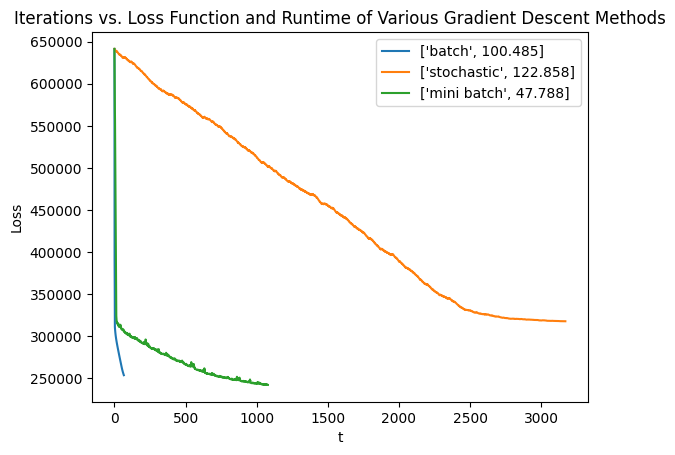

In [23]:
plt.plot(grad_loss)
plt.plot(stoch_loss)
plt.plot(mb_loss)
plt.xlabel("t")
plt.ylabel("Loss")
plt.title("Iterations vs. Loss Function and Runtime of Various Gradient Descent Methods")
leg = [["batch", round(grad_time,3)], ["stochastic", round(stoch_time,3)], ["mini batch", round(mb_time,3)]]
plt.legend(leg)

# Your solution:

First, it's important to be clear in regards to runtime vs iteration count. It is to be expected that the more information we use per iteration (i.e larger batch size), the fewer iterations it will take to get a result, at the cost of more computations per iteration. This clearly seems to balance out for the case of mini batch and stochastic (with the settings I used), but has a much bigger impact on batch, where iterations are very low but computation time is very high.

As expected, the stochasitc plot has a very constant, linear downward direction towards its point of convergence, which we can infer would be around where the mini batch plot is near and where the batch plot stopped short of. This, I admit, is due to poor implimentation on my part, but I'm uncertain where I specifically went wrong. The other two plots are about what we expect: a sharp downward drop into a smoothing convergence, like what we see with the mini batch plot.




---



---

# Q2: Implementing Batch Naive Bayes (20pt)

Implement a multinomial naive Bayes classifier in the `NaiveBayes` class.  Your implementation should support add-one smoothing. Whether or not to use add-one smoothing is controlled via an argument to the constructor; add-one smoothing is enabled by default.

-  `__init(useAddOneSmoothing=True)__` : constructor.

- `fit(X,Y)`: method to train the naive Bayes model.

- `predict(X)`: method to use the trained naive Bayes model for prediction.

- `predictProbs(X)`: outputs a matrix of predicted posterior class probabilities.


The training data for multinomial naive Bayes is specified as feature counts: `X[i,j]` is the number of times
feature $j$ occurs in instance $i$ (or you can think of it as that instance $i$ is characterized by a particular
real-valued amount of feature $j$).

We are here using the multinomial distribution. Suppose our dataset has $D$ features and $K$ classes. Then the
multinomial distribution for a particular sample $(\m{x},y)$, where $\m{x}=[x_1,\dots, x_D]\in \mb{R}^D$, $x_j\in\mb{N}$ for $j=1,\dots, D$ and $y\in \{1,\dots, K\}$ is
\begin{align}
p(\m{x}|y) = \frac{(\sum_j x_j)! }{x_1! x_2! \dots x_D!} p_{y1}^{x_1}p_{y2}^{x_2}\dots p_{yD}^{x_D}
\end{align}
and the label distribution $p(y)$ (in this case, a categorical distribution) is $\mm\pi=[\pi_1, \dots, \pi_K]$.

The naive Bayes assumption (that each instance is independent given the class label) is used in the sense that
that we are assuming the generative process is

- Picking a class $y$ according to the label distribution
$p(y)$.

- Generate a sequence of features, independently according to a multinomial distribution conditioned on the class $y$: $\m{p}_y=(p_{y1}, p_{y2}, \dots, p_{yD})$ with $\sum_j p_{yj}=1$.

What you are given is the count of each feature generated by this process stored in a vector $\m{x}$. This is a useful model for predicting, say, document classes, where $d$ is size of vocabulary
and $K$ is number of document classes.

The MLE parameter estimation for this naive Bayes probabilistic model is
- The label distribution $\hat{p}(y)=\hat{\mm\pi}$
\begin{align}
\hat{\mm{\pi}} = \frac{N_c}{N}
\end{align}
where $N_c$ is the number of samples with label $y=c$ and $N$ is the total samples.

- The multinormial distribution with label $y=c$ is $\hat{\m{p}}_c=[\hat{p}_{c1}, \dots, \hat{p}_{cD}]$ and
\begin{align}
\hat{p}_{cj}  =\frac{N_{cj}}{N_c}
\end{align}
where $N_{cj}$ is total occurrences of feature $j$ in samples with label $y=c$.


- When using add-one smoothing, we estimate $\hat{p}_{cj} $ with
\begin{align}
\hat{p}_{cj}  = \frac{N_{cj}+1}{N_c +D}
\end{align}

During prediction, given feature count vector $\m{x}$, we estimate label $y$ posterior probability with
\begin{align}
\hat{p}(y|\m{x})\propto \hat{p}(y)\hat{p}_{y1}^{x_1}\hat{p}_{y2}^{x_2}\dots \hat{p}_{yD}^{x_D}
\end{align}
up to normalization. You might want to implement the equation above with summation of log probabilities
for better numerical stability. If you choose to do so, you would need another **numerical trick** below.

After
obtaining the log probabilities for each classes, $\m{z}=\bcm\log \hat{p}(y=1|\m{x}),\log \hat{p}(y=2|\m{x}), \dots, \log \hat{p}(y=K|\m{x}) \ecm$. The actual probability distribution to be output is
\begin{align}
p(y=c|\m{x}) &=\frac{\exp(z_c)}{\sum_{c=1}^K \exp(z_c)}\\
&= \frac{\exp(z_c-z)}{\sum_{c=1}^K \exp(z_c-z)}
\end{align}
where $z=\max_c z_c$. Here we subtract $\max_c z_c$ from the log probabilities for better numerical stability.

The `predictProbs(X)` function takes in a matrix $X$ of $N$ instances and outputs an $N\times K$ matrix of posterior
probabilities. Each row $i$ of the returned matrix represents the posterior probability distribution over the $K$
classes for the $i$-th training instance. (Note that each row of the returned matrix will sum to 1.)

In [ ]:
class NaiveBayes:

    def __init__(self, useAddOneSmoothing=True, alpha=1):
        """
        Constructor
        """
        self.AOS = useAddOneSmoothing
        self.smoother = alpha

    def prior(self):
        """
        Solves for the priors \pi = P(y)
        Arguments:
            None
        Returns:
            \pi, a vector of size num_classes
        """
        p = np.zeros((self.num_classes,))
        for i in self.y:
            p[i] += 1
        return p/self.samples

    def fit(self, X, y):
        """
        Trains the model
        Arguments:
            X is a n-by-d numpy array
            y is an n-dimensional numpy array
        """

        ### baseline attributes and priors
        self.y = y
        self.samples, self.features = X.shape # m,d
        self.classes = np.unique(y)
        self.num_classes = self.classes.shape[0]
        self.priors = self.prior()


        ### distinct feature values per column
        self.unique_features = []
        for d in range(self.features):
            self.unique_features.append(np.unique(X[:,d]))


        ### counts
        self.N_cd = np.zeros((self.num_classes, self.features)) # count of feature i per c
        self.N_c = np.zeros((self.num_classes)) # total count of feautures per c

        for c in self.classes: # for each available y = c

            # get indices where class is c
            indices = []
            for i in range(self.samples):
                if c == self.y[i]:
                    indices.append(i)

            # get values of features where y = c
            temp_count = []
            for d in range(self.features):
                temp_count.append(np.sum(X[indices,d]))

            # adding to N_ci and N_c
            self.N_cd[c] = temp_count
            self.N_c[c] = np.sum(temp_count)


    def prod_theta(self, x_i, c):
        """
        Solves for theta_c = P(x_i|y=c) = P(x_0|y=c)*P(x_1|y=c)*...*P(x_D|y=c)
        Arguments:
            x_i is a sample of size self.features
        Returns:
            theta_c, an integer
        """
        # Add One Smoothing
        if self.AOS:
            self.smoother = 1
        else:
            self.smoother = 0

        value = 1
        for d in range(self.features):
            numer = self.N_cd[c,d] + self.smoother
            denom = self.N_c[c] + self.smoother*self.features
            value = value * ((numer/denom)**x_i[d])
        return value

    def log_theta(self, x_i, c):
        """
        Solves for log(theta_c) = log(P(x_i|y=c)) = log(P(x_0|y=c))+log(P(x_1|y=c))+...+log(P(x_D|y=c))
        Arguments:
            x_i is a sample of size self.features
        Returns:
            log(theta_c), an integer
        """
        if not self.AOS:
            self.smoother = 0

        value = 1
        for d in range(self.features):
            numer = self.N_cd[c,d] + self.smoother
            denom = self.N_c[c] + self.smoother*self.features
            value += np.log(((numer/denom)**x_i[d]))
        return value

    def predict(self, X, logLikelyhood=True):
        """
        Used the model to predict values for each instance in X
        Arguments:
            X is a n-by-d numpy array
        Returns:
            an n-dimensional numpy array of the predictions
        """
        ### prediction matrix y_hat
        test_samples = X.shape[0]
        self.prediction = np.zeros((test_samples,))

        ### calculating predictions for each sample x_i
        for i in range(test_samples):
            temp_likelyhood = np.zeros((self.num_classes,))

            # for logarithmic needs
            if logLikelyhood:
                for c in range(self.num_classes):
                    temp_likelyhood[c] = np.log(self.priors[c]) + self.log_theta(X[i,:], c)
            else:
                for c in range(self.num_classes):
                    temp_likelyhood[c] = self.priors[c]*self.prod_theta(X[i,:], c)

            # finding the most likely class
            max_index = np.argmax(temp_likelyhood)
            self.prediction[i] = self.classes[max_index]

        return self.prediction


    def predictProbs(self, X, logLikelyhood=True):
        """
        Used the model to predict a vector of class probabilities for each instance in X
        Arguments:
            X is a n-by-d numpy array
        Returns:
            an n-by-C numpy array of the predicted class probabilities (for C classes)
        """
        ### prediction matrix y_hat
        test_samples = X.shape[0]
        self.probabilities = np.zeros((test_samples, self.num_classes))

        ### calculating predictions for each sample x_i
        for i in range(test_samples):
            # for logarithmic needs
            if logLikelyhood:
                for c in range(self.num_classes):
                    self.probabilities[i,c] = np.log(self.priors[c]) + self.log_theta(X[i,:], c)
            else:
                for c in range(self.num_classes):
                    self.probabilities[i,c] = self.priors[c]*self.prod_theta(X[i,:], c)

        return self.probabilities

    def score(self, y):
        """
        Finds the accuracy of the predictions
        Arguments:
            y is a np array of size n, likely a testing set
        """
        n = len(self.prediction)
        error = self.prediction-y
        count = 0
        for i in error:
            if i == 0:
                count+=1
        return count/n

In [ ]:
#from sklearn import datasets
from sklearn.metrics import accuracy_score

# load the data set
dataset = datasets.load_digits()
X = dataset.data
y = dataset.target

n, d = X.shape
nTrain = int(0.5*n)  # training on 50% of the data

# shuffle the data
idx = np.arange(n)
np.random.seed(13)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]

# split the data
Xtrain = X[:nTrain, :]
ytrain = y[:nTrain]
Xtest = X[nTrain:, :]
ytest = y[nTrain:]

print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)


(898, 64)
(898,)
(899, 64)
(899,)


In [ ]:
from sklearn.naive_bayes import MultinomialNB # as a check of my implimentation
"""
SKLEARN naiveBayes package
"""

sk_bayes = MultinomialNB()
sk_bayes.fit(Xtrain, ytrain)

print("Accuracy percent of sklearn Multinomial NBC is:", round(sk_bayes.score(Xtest, ytest),7))

Accuracy percent of sklearn Multinomial NBC is: 0.89099


In [ ]:
"""
My implimentation
"""

# train the naive Bayes
modelNB = NaiveBayes(useAddOneSmoothing=True)
modelNB.fit(Xtrain, ytrain)

# output predictions on the remaining data
ypred_NB = modelNB.predict(Xtest)

# calculate the posterior probability
yposterior_NB = modelNB.predictProbs(Xtest)

print("Accuracy percent of my implimentation of Multinomial NBC is:", round(modelNB.score(ytest),7))


Accuracy percent of my implimentation of Multinomial NBC is: 0.89099




---



---


# Q3: Decision Trees (30pt)

In this question we are going to focus on decision trees, manually follow the algorithm, and investigate the decisions the algorithm makes. Our goal is to justify the steps of the algorithm and investigate the redundancy in the space of decision trees. Consider the following decision tree:


<img src="https://github.com/yexf308/MachineLearning/blob/main/homework/HW3/Decision_tree1.png?raw=true" width="400" />

## Q3.1 Decision Boundaries  (5pt)
 Draw the decision boundaries defined by this tree. Each leaf of the tree is labeled with a letter. Write this letter in the corresponding region of instance space and label the axes. Your solution should look like Next Figure, where you will replace the boundary thresholds and labels based on the provided decision tree.

  <img src="https://github.com/yexf308/MachineLearning/blob/main/homework/HW3/Decision_tree2.png?raw=true" width="400" />

In [ ]:
!['Decision Bounds'](https://drive.google.com/uc?export=view&id=1xhTudA_9F3P5jVgXVpZd1m1__jwpcKm1)

/bin/bash: -c: line 1: syntax error near unexpected token `https://drive.google.com/uc?export=view'
/bin/bash: -c: line 1: `['Decision Bounds'](https://drive.google.com/uc?export=view&id=1xhTudA_9F3P5jVgXVpZd1m1__jwpcKm1)'



---

## Q3.2 Decision Boundaries  (5pt)
Give another decision tree that is different from decision tree in first Figure but defines the same decision boundaries. This demonstrates that the space of decision trees is syntactically redundant. Would this redundancy affect the accuracy of the learned trees? What are potential benefits of this redundancy? (i.e., Does it increase the computational complexity of finding an accurate tree?) Explain using 3-5 sentences.

In [ ]:
![](https://drive.google.com/uc?export=view&id=1AABvopogEiAN6TgmbbItNFttP0hgvcLL)

/bin/bash: -c: line 1: syntax error near unexpected token `https://drive.google.com/uc?export=view'
/bin/bash: -c: line 1: `[](https://drive.google.com/uc?export=view&id=1AABvopogEiAN6TgmbbItNFttP0hgvcLL)'


# Your solution:

In this case, the trees only differ on when we decide to look at $x_2$, the first deciding after looking at $x_1$. The accuracy of either tree is only a matter of interpretation, and I would prefer to decide one feature at a time rather than reaccessing information about, say $x_1$, after already making a decision on it. Computationally, if we were to use the first tree as our model, we would be checking $x_1$ twice, where with proper implimentation and a three-leaf tree, we would only have to check each $x_1$ once.

As for benefits to the redundancy, it could be the case that over half of the sample has $x_1>25$, thus it would be wise to check it first to decrease overall computation time. Either way, I don't believe (for this particular example) that the accuracy of the tree changes much in regards to either displayed tree.



---


## Q3.3 Building A Decision Tree (5pt)
Consider the training samples in next Figure, where A, B, C denote three different features and Y denotes the output we want to predict:


<img src="https://github.com/yexf308/MachineLearning/blob/main/homework/HW3/Decision_tree3.png?raw=true" width="200" />

What feature would be chosen for the split at the root of a decision tree using the Information Gain criterion? Please show your calculations and explain your reasoning. What is the relationship between the selected feature and outcome Y?

# Your solution:

We pick the feature with the highest information gain, with respect to ID3, which turns out to be feature $C$. From a glance, we can see $C$ and $Y$ have an inverse relationship.

$$
\begin{align*}
H(\mathcal{S}) &= -\sum_{i=1}^k p_i\log_2 p_i\\
&= -\frac{3}{6}\log_2\frac{3}{6} - \frac{3}{6}\log_2\frac{3}{6}\\
&= \frac{1}{2} + \frac{1}{2}\\
&= 1\\
\\
H(\mathcal{S}|A) &= \sum_{a\in A} \frac{|\mathcal{S}_a|}{|\mathcal{S}|}H(\mathcal{S}_a)\\
&= -\frac{3}{6}*(\frac{1}{3}\log_2\frac{1}{3}) - \frac{3}{6}*(\frac{2}{3}\log_2\frac{2}{3})\\
&≈ .459 \\
\text{IG}(\mathcal{S}, A) &= H(\mathcal{S}) - H(\mathcal{S}|A) = 1 - .459 = .541\\
\\
H(\mathcal{S}|B) &= \sum_{b\in B} \frac{|\mathcal{S}_b|}{|\mathcal{S}|}H(\mathcal{S}_b)\\
&= -\frac{4}{6}*(\frac{2}{4}\log_2\frac{2}{4}) - \frac{2}{6}*(\frac{1}{2}\log_2\frac{1}{2})\\
&= .5 \\
\text{IG}(\mathcal{S}, B) &= H(\mathcal{S}) - H(\mathcal{S}|B) = 1 - .5 = .5\\
\\
H(\mathcal{S}|C) &= \sum_{c\in C} \frac{|\mathcal{S}_c|}{|\mathcal{S}|}H(\mathcal{S}_c)\\
&= -\frac{3}{6}*(\frac{0}{3}\log_2\frac{0}{3}) - \frac{3}{6}*(\frac{3}{3}\log_2\frac{3}{3})\\
&= 0 \\
\text{IG}(\mathcal{S}, C) &= H(\mathcal{S}) - H(\mathcal{S}|C) = 1 - 0 = 1\\
\end{align*}
$$



---


## Q3.4 Random Splitting  (10pt)
In the basic decision tree algorithm, we choose the feature/value pair with the maximum Information Gain (i.e., $IG(Y |X ) = H (Y ) − H (Y |X ))$ as the criterion to use at each internal node of the decision tree. Suppose we modified the algorithm to choose at random from among those feature/value combinations that had non-zero information gain, but that we kept all other parts of the algorithm unchanged.

Prove that if a splitting feature/value combination has non-zero information gain at an internal node, then at least one training example must be sent to each of the child nodes.

**Hint:** You may prove the contrapositive of the statement instead, that is, if all examples are sent to one of the child nodes (they have the same feature/value pair) then the information gain is zero.


# Your solution:

We choose to prove the contrapositive. Let $\mathcal{S} = \{1,2,...,k\}$ be samples and $F = \{f_1, f_2, ..., f_{t}\}$ be options for a feature $F$ such that, WLOG, $\forall s\in\mathcal{S}, s\in\mathcal{S}_{f_1}.$ Thus, $\mathcal{S}\subset \mathcal{S}_{f_1}$, but by definition, $\mathcal{S}_{f_1}\subset \mathcal{S}$, so $\mathcal{S} = \mathcal{S}_{f_1}.$

Then, we have the following:
$$
\begin{align*}
H(\mathcal{S}|F) &= \sum_{f\in F} \frac{|\mathcal{S}_f|}{|\mathcal{S}|}H(\mathcal{S}_f)\\
&= \frac{|\mathcal{S}_{f_1}|}{|\mathcal{S}|}H(\mathcal{S}_{f_1}) + \frac{|\mathcal{S}_{f_2}|}{|\mathcal{S}|}H(\mathcal{S}_{f_2}) + ... + \frac{|\mathcal{S}_{f_t}|}{|\mathcal{S}|}H(\mathcal{S}_{f_t})\\
&= \frac{k}{k}H(\mathcal{S}_{f_1}) + \frac{0}{k}H(\mathcal{S}_{f_2}) + ... + \frac{0}{k}H(\mathcal{S}_{f_t})\\
&= 1*H(\mathcal{S}_{f_1}) + 0 + ... + 0\\
&= H(\mathcal{S}_{f_1})\\
&= H(\mathcal{S})\\
\\
\text{IG}(\mathcal{S}; F) &= H(\mathcal{S})- H(\mathcal{S}|F)\\
&= H(\mathcal{S})- H(\mathcal{S})\\
&= 0 \\
\blacksquare
\end{align*}
$$

This is equivalent to the above statement that if a splitting feature/value combination has non-zero information gain at an internal node, then at least one training example must be sent to each of the child nodes.



---


## Q3.5 Random Splitting (5pt)
How do you think this change (i.e., choosing at random from among those feature/value combinations that have non-zero information gain) would affect the accuracy of the decision trees produced on average? To achieve the same accuracy, how are the trees different (e.g. size) on average? Why? Explain using 3-5 sentences.

# Your solution:

Since there is no sense of quantifying which features are important, we must sort through each and every choice of each feature before we can be certain that we have finished the tree. Because of this, we will be accurate, but have massive amounts of overfitting and, if there are $k$ features $F$, where $F_i = \{ f_1, f_2,..., f_{j_i}\}$, then we will have a height of at least $k$ and number of decisions equal to $\prod_{i=1}^k|F_i|-1$, which can get quite large if $k$ and/or the $j_i$'s become large and become a bore to understand at a glance.

In other words, without a stopping threshold, we will have an extremely large runtime and have massive overfitting issues (massive tree size, etc.), but with a stopping threshold, we have the potential to lose out on accuracy if we don't randomly select any high information-gain features, which cannot be guarenteed. The same can be done for a ID3 derived tree by just decreasing the stopping threshold with a guarentee of getting high information-gain features in the tree first, leading to a more informative tree altogether.